In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [12]:
data = pd.read_csv("/content/co2_gr_mlo.csv", comment="#")

In [13]:
data.head()

,year,ann inc,unc
0,1959,0.94,0.11
1,1960,0.50,0.11
2,1961,0.96,0.11
3,1962,0.65,0.11
4,1963,0.71,0.11


In [14]:
data['year'] = pd.to_datetime(data['year'], format='%Y')
data.set_index('year', inplace=True)

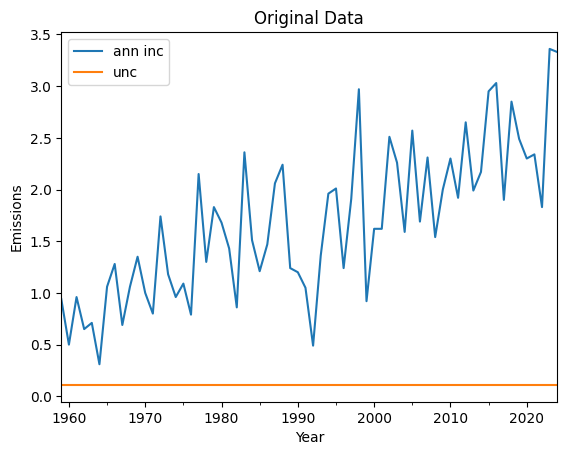

In [15]:
data.plot(title='Original Data')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()

In [17]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data[['ann inc']])
scaled_data = pd.Series(scaled.flatten(), index=data.index)

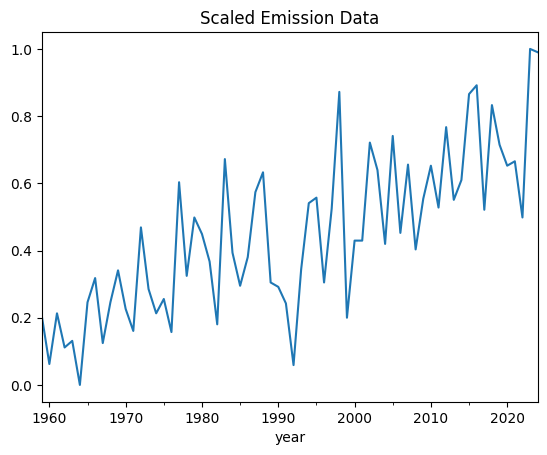

In [18]:
scaled_data.plot(title='Scaled Emission Data')
plt.show()

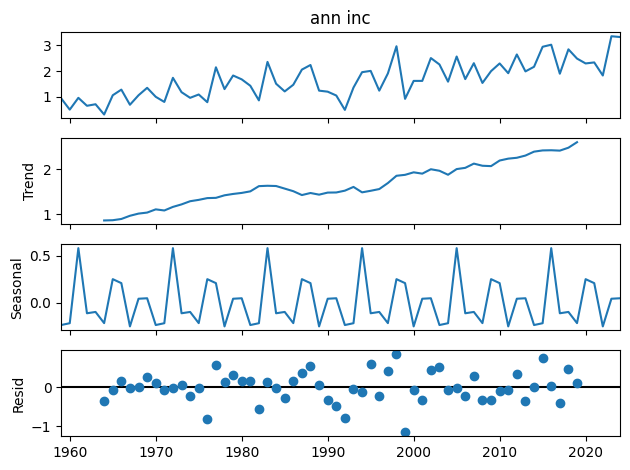

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['ann inc'], model="additive", period=11)


decomposition.plot()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


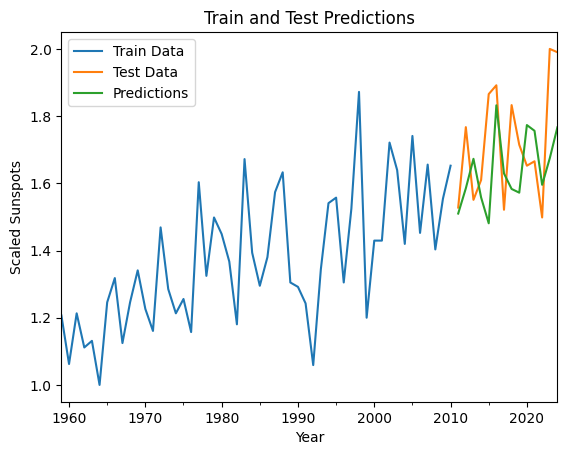

In [22]:
scaled_data = scaled_data + 1
train_data = scaled_data[:int(len(scaled_data)*0.8)]
test_data = scaled_data[int(len(scaled_data)*0.8):]
model_add = ExponentialSmoothing(train_data, trend='add', seasonal='mul', seasonal_periods=11).fit()
test_predictions_add = model_add.forecast(steps=len(test_data))
ax = train_data.plot(label='Train Data')
test_data.plot(ax=ax, label='Test Data')
test_predictions_add.plot(ax=ax, label='Predictions')
ax.set_title('Train and Test Predictions')
ax.set_xlabel('Year')
ax.set_ylabel('Scaled Sunspots')
ax.legend()
plt.show()

In [25]:
import numpy as np
rmse = np.sqrt(mean_squared_error(test_data, test_predictions_add))
print(f'Test RMSE: {rmse:.4f}')

print(f'Scaled data mean: {scaled_data.mean():.4f}, sqrt(variance): {np.sqrt(scaled_data.var()):.4f}')

Test RMSE: 0.1861
Scaled data mean: 1.4480, sqrt(variance): 0.2400


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


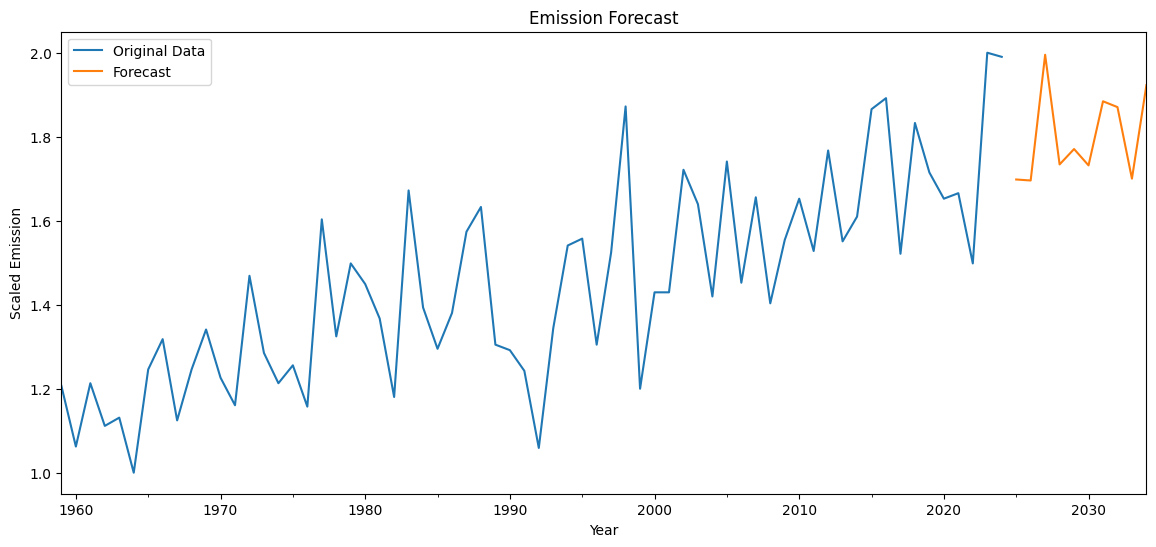

In [28]:
final_model = ExponentialSmoothing(scaled_data, trend='add', seasonal='mul', seasonal_periods=11).fit()
future_steps = 10
final_predictions = final_model.forecast(steps=future_steps)
plt.figure(figsize=(14, 6))
ax = scaled_data.plot(label='Original Data')
final_predictions.plot(ax=ax, label='Forecast')
ax.set_title('Emission Forecast')
ax.set_xlabel('Year')
ax.set_ylabel('Scaled Emission')
ax.legend()
plt.show()